# <center>Case study on Supervised learning</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.  Read the dataset to the python environment. 

In [2]:
df=pd.read_excel("iris_28a2a57d0a72363b1443003895d1aaa8.xls")
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Do necessary pre-processing steps. 

In [5]:
#Checking the null values
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


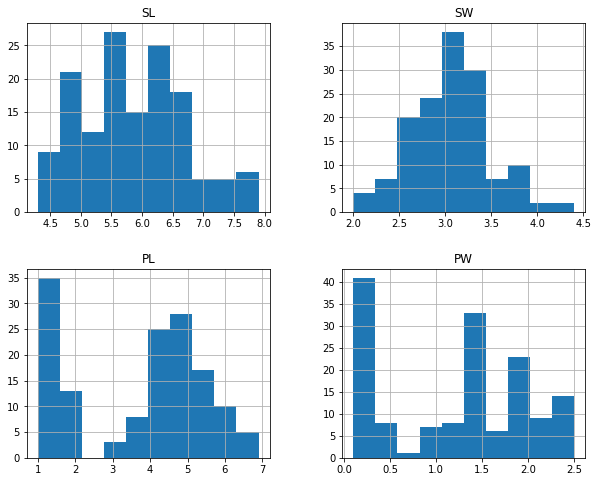

In [7]:
freqgraph=df.select_dtypes(include=['int32','int64','float'])
freqgraph
freqgraph.hist(figsize=(10,8))
plt.show()

In [8]:
#Filling the null values
df['SL']=df['SL'].fillna(df['SL'].median())
df['SW']=df['SW'].fillna(df['SW'].median())
df['PL']=df['PL'].fillna(df['PL'].median())

In [9]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

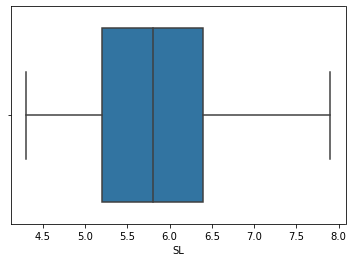

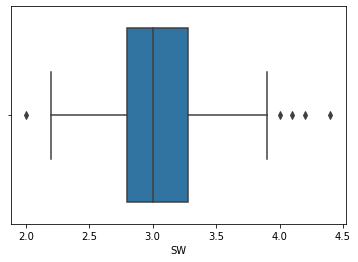

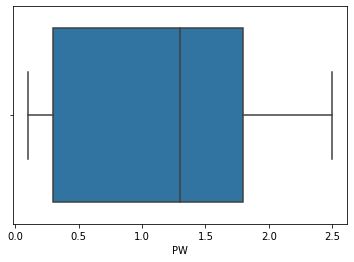

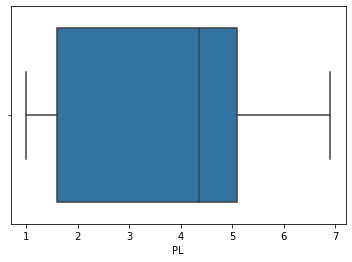

In [10]:
#Plotting the boxplots 
for i in ['SL','SW','PW','PL']:
  sns.boxplot(x=df[i])
  plt.show()

#### The feature 'SW' has outliers.

In [12]:
#Removing the outlier
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [13]:
print("Q1 :",Q1)
print("Q2 :",Q2)
print("Q3 :",Q3)

Q1 : 2.8
Q2 : 3.0
Q3 : 3.25


In [14]:
IQR=Q3-Q1

In [15]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [16]:
print("lower_limit :",lower_limit)
print("upper_limit :",upper_limit)

lower_limit : 2.1249999999999996
upper_limit : 3.9250000000000003


In [17]:
outlier=[]
for x in df['SW']:
    if((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [18]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [19]:
index1=df['SW'][(df['SW']<lower_limit)|(df['SW']>upper_limit)].index
index1

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [20]:
df.drop(index1,inplace=True)

<AxesSubplot:xlabel='SW'>

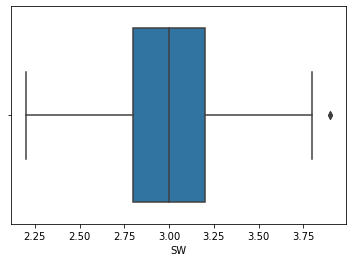

In [21]:
sns.boxplot(x=df['SW'])

#### Now the outliers are removed.

In [22]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [23]:
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    df[a[i]]=label_en.fit_transform(df[a[i]])

In [24]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [25]:
x=df.drop(['Classification'],axis=1)
y=pd.DataFrame(df['Classification'])

In [26]:
x.shape

(145, 4)

In [27]:
y.shape

(145, 1)

In [28]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [41]:
x_train.shape

(108, 4)

In [42]:
y_train.shape

(108, 1)

In [43]:
x_test.shape

(37, 4)

In [44]:
y_test.shape

(37, 1)

   - **Logistic Regression** 

In [45]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred=logit_model.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [47]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='macro'))
print("Recall is:",recall_score(y_test,y_pred,average='macro'))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.8918918918918919
Precision is: 0.8834498834498835
Recall is: 0.8915343915343915
f1 score is: 0.8839506172839506


In [48]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

- **KNN**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

In [50]:
acc_values

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

Text(0, 0.5, 'accuracy')

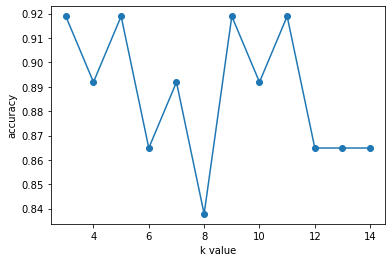

In [51]:
#Lets check for which k value have the highest accuracy.
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [52]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [53]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='macro'))
print("Recall is:",recall_score(y_test,y_pred,average='macro'))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.8648648648648649
Precision is: 0.861111111111111
Recall is: 0.8677248677248678
f1 score is: 0.8570071903405238


In [54]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

In [55]:
df.describe()

,SL,SW,PL,PW,Classification
count,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897,1.027586
std,0.816827,0.374354,1.712265,0.758219,0.816027
min,4.300000,2.200000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.900000,3.900000,6.900000,2.500000,2.000000


###### standard scaling is done to check the data is improving or not

In [56]:
#standard scaling
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [58]:
#Again the LR and KNN is done.
logit_model=LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred=logit_model.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [59]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='macro'))
print("Recall is:",recall_score(y_test,y_pred,average='macro'))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9459459459459459
Precision is: 0.9391534391534391
Recall is: 0.9391534391534391
f1 score is: 0.9391534391534391


In [60]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [61]:
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Text(0, 0.5, 'accuracy')

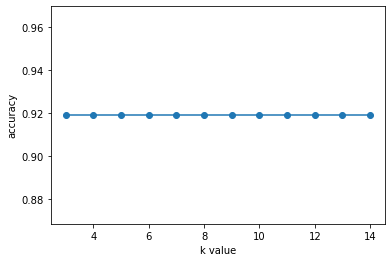

In [62]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [63]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [64]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='macro'))
print("Recall is:",recall_score(y_test,y_pred,average='macro'))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.918918918918919
Precision is: 0.9095238095238095
Recall is: 0.9153439153439153
f1 score is: 0.9112132182307621


In [65]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

- **Decision Tree Classifier**

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model=DecisionTreeClassifier()

In [68]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
y_pred=dt_model.predict(x_test)

In [70]:
print("Accuracy on Decision tree model is:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy on Decision tree model is: 0.9459459459459459
f1 score is: 0.9410256410256409


In [71]:
y_test.value_counts()

Classification
0                 14
2                 14
1                  9
dtype: int64

In [72]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 12]], dtype=int64)

#### SVM 
- **Linear SVM**

In [73]:
from sklearn.svm import SVC

In [74]:
svm_linear=SVC(kernel='linear')

In [75]:
svm_linear.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [76]:
y_pred=svm_linear.predict(x_test)

In [77]:
print("Accuracy using linear SVC is:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy using linear SVC is: 0.972972972972973
f1 score is: 0.9688979039891819


- **polynomial SVM**

In [80]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train, y_train)
SVC(kernel='poly')
y_pred=svm_poly.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))


Accuracy is: 0.8648648648648649
f1 score is: 0.8596349973161569


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


- **Radial SVM**

In [81]:
#Radial SVM
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
SVC()
y_pred=svm_radial.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.972972972972973
f1 score is: 0.9688979039891819


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


- **Random forest algorithm**

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf=RandomForestClassifier()

In [84]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

<ipython-input-84-20ccf139cd6c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


In [85]:
from sklearn.metrics import f1_score,confusion_matrix

In [86]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='macro'))
print("Recall is:",recall_score(y_test,y_pred,average='macro'))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9459459459459459
Precision is: 0.9393939393939394
Recall is: 0.9523809523809524
f1 score is: 0.9410256410256409


In [87]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 12]], dtype=int64)

In [88]:
#feature importance
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW    45.322057
PL    37.927257
SL    14.587218
SW     2.163469
dtype: float64

In [89]:
#find turning of hyper parameter
rf.fit(x_train,y_train)

<ipython-input-89-09fedd507496>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier()

In [90]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')

In [91]:
rft.fit(x_train,y_train)

<ipython-input-91-c26e1322ddde>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rft.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [92]:
y_pred=rft.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='macro'))
print("Recall is:",recall_score(y_test,y_pred,average='macro'))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9459459459459459
Precision is: 0.9391534391534391
Recall is: 0.9391534391534391
f1 score is: 0.9391534391534391


- **Gradient boosting**

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

In [94]:
y_pred=gb.predict(x_test)

In [95]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='macro'))
print("Recall is:",recall_score(y_test,y_pred,average='macro'))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.9459459459459459
Precision is: 0.9393939393939394
Recall is: 0.9523809523809524
f1 score is: 0.9410256410256409


- **Extreme gradient boosting**

In [96]:
from xgboost import XGBClassifier

In [97]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

[19:16:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [98]:
y_pred=xgb.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='macro'))
print("Recall is:",recall_score(y_test,y_pred,average='macro'))
print("f1 score is:",f1_score(y_test,y_pred,average='macro'))

Accuracy is: 0.918918918918919
Precision is: 0.9076923076923077
Recall is: 0.9153439153439153
f1 score is: 0.9103313840155945


#### Radial SVM classification model gives the best result to predict iris species, the accuracy is: 0.972972972972973
#### and f1 score is: 0.9688979039891819.

- **Random forest algorithm**
#### Accuracy is: 0.9459459459459459
#### f1 score is: 0.9391534391534391